In [1]:
# Importing Libraries

import numpy as np 
import pandas as pd
import os

df = pd.read_csv("london_merged.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [2]:
df["timestamp"] = pd.to_datetime(df["timestamp"])#将“timestamp”列转换为日期时间类型
df = df.set_index("timestamp")

df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
df["hour"] = df.index.hour
df["day_of_month"] = df.index.day
df["day_of_week"]  = df.index.dayofweek
df["month"] = df.index.month
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


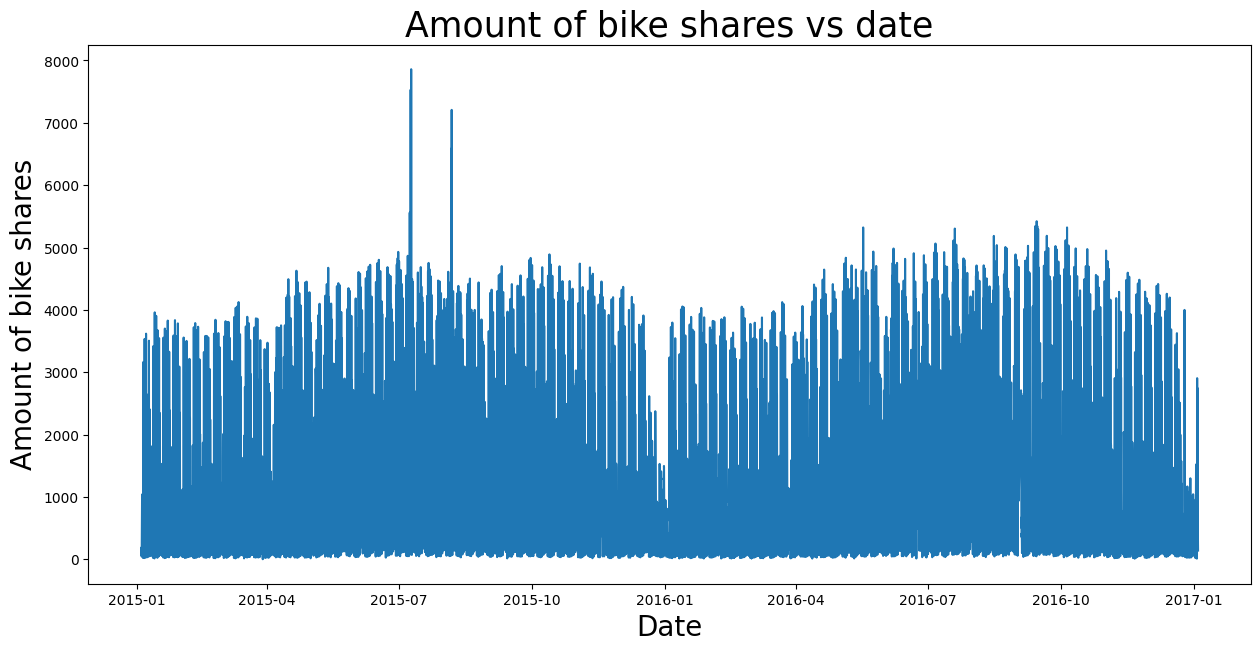

In [6]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=df.index, y=df.cnt,data=df)
ax.set_title("Amount of bike shares vs date", fontsize=25)
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

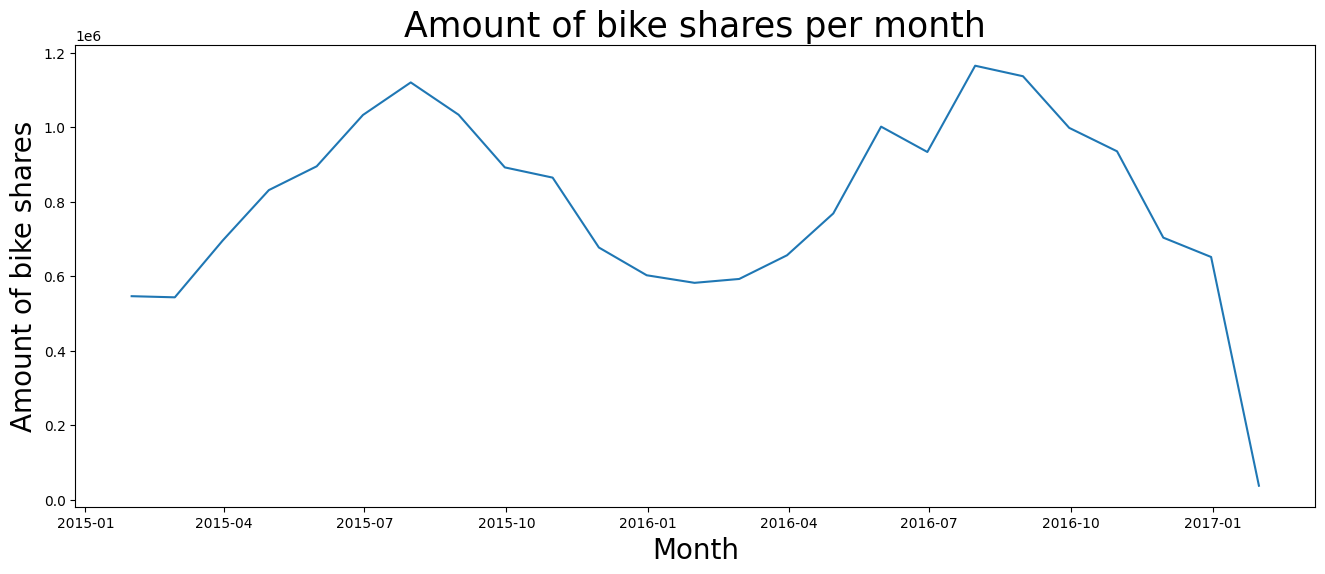

In [7]:
# Resample timeseries, for plotting timeseries month frequency
df_by_month = df.resample("M").sum()

plt.figure(figsize=(16,6))
ax = sns.lineplot(data=df_by_month,x=df_by_month.index,y=df_by_month.cnt)
ax.set_title("Amount of bike shares per month", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

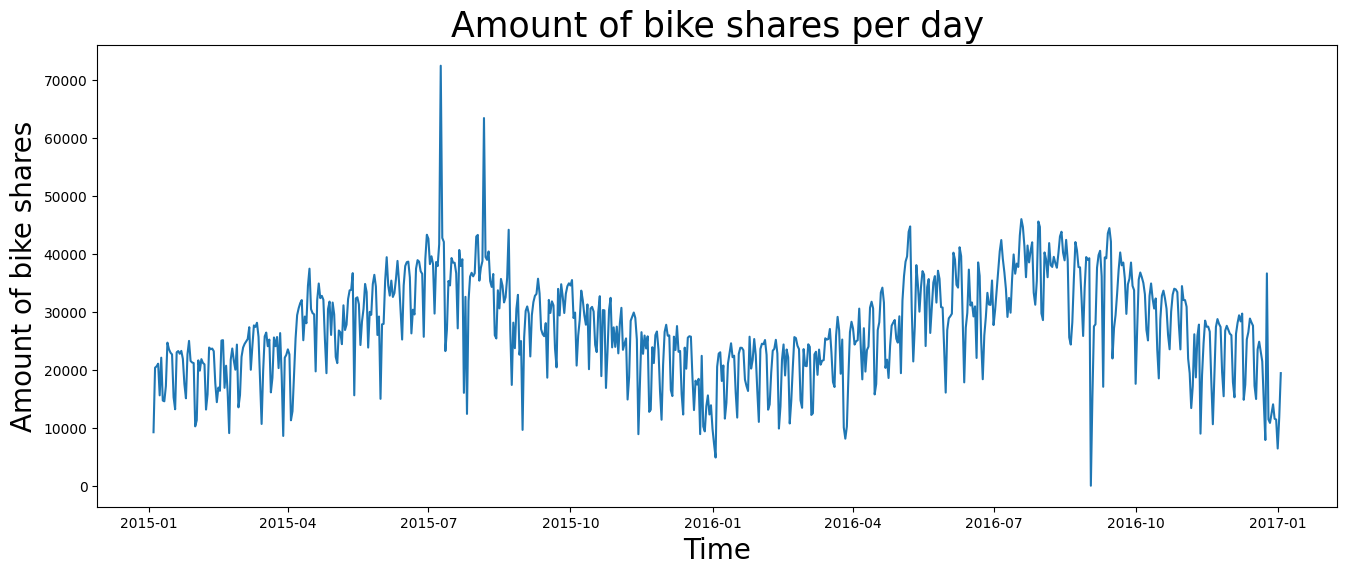

In [8]:
df_by_week = df.resample("D").sum()
plt.figure(figsize=(16,6))
ax = sns.lineplot(data=df_by_week,x=df_by_week.index,y=df_by_week.cnt)
ax.set_title("Amount of bike shares per day", fontsize=25)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

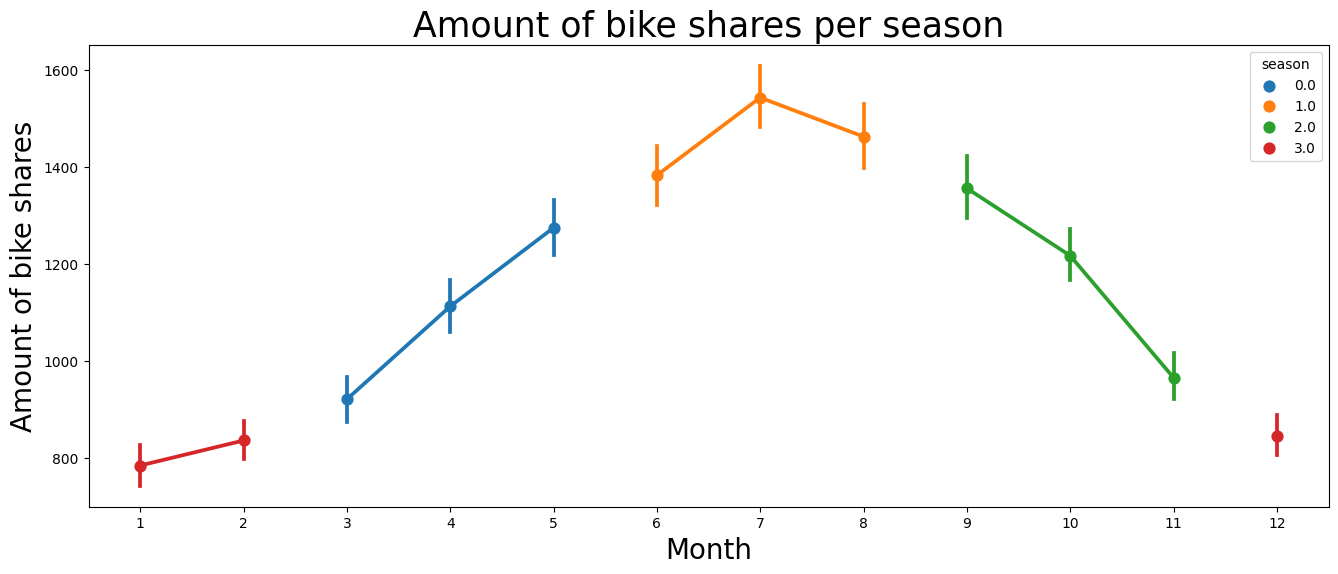

In [9]:
plt.figure(figsize=(16,6))
ax = sns.pointplot(data=df,hue=df.season,y=df.cnt,x=df.month)
ax.set_title("Amount of bike shares per season", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

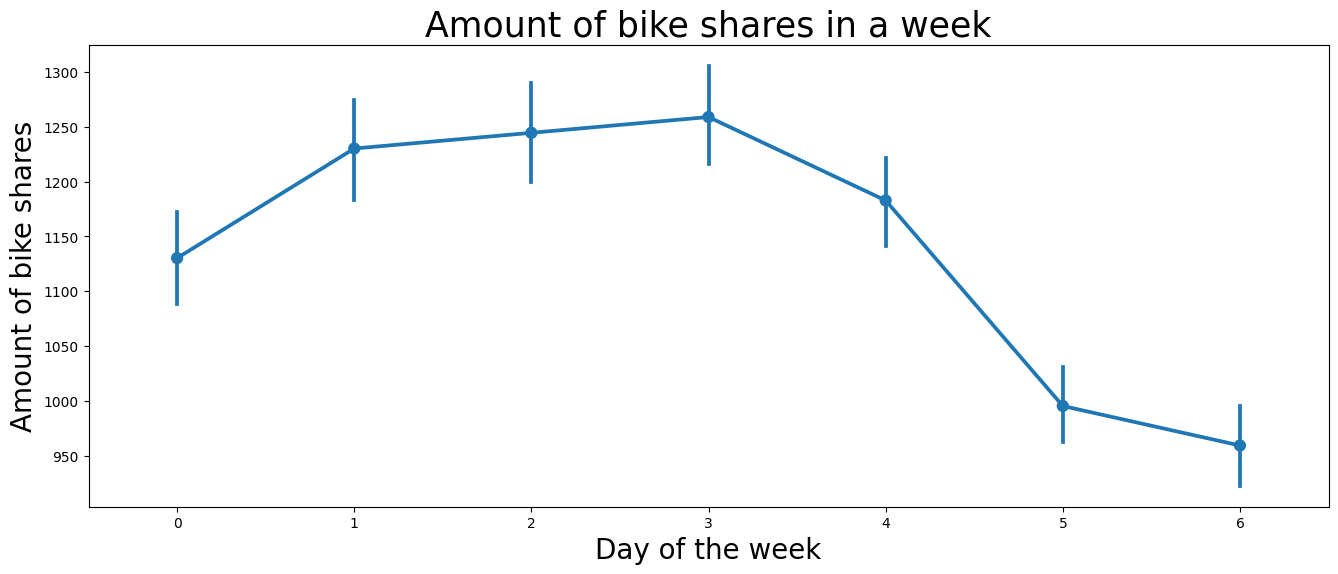

In [10]:
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='day_of_week', y='cnt',data=df)
ax.set_title("Amount of bike shares in a week", fontsize=25)
ax.set_xlabel("Day of the week", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

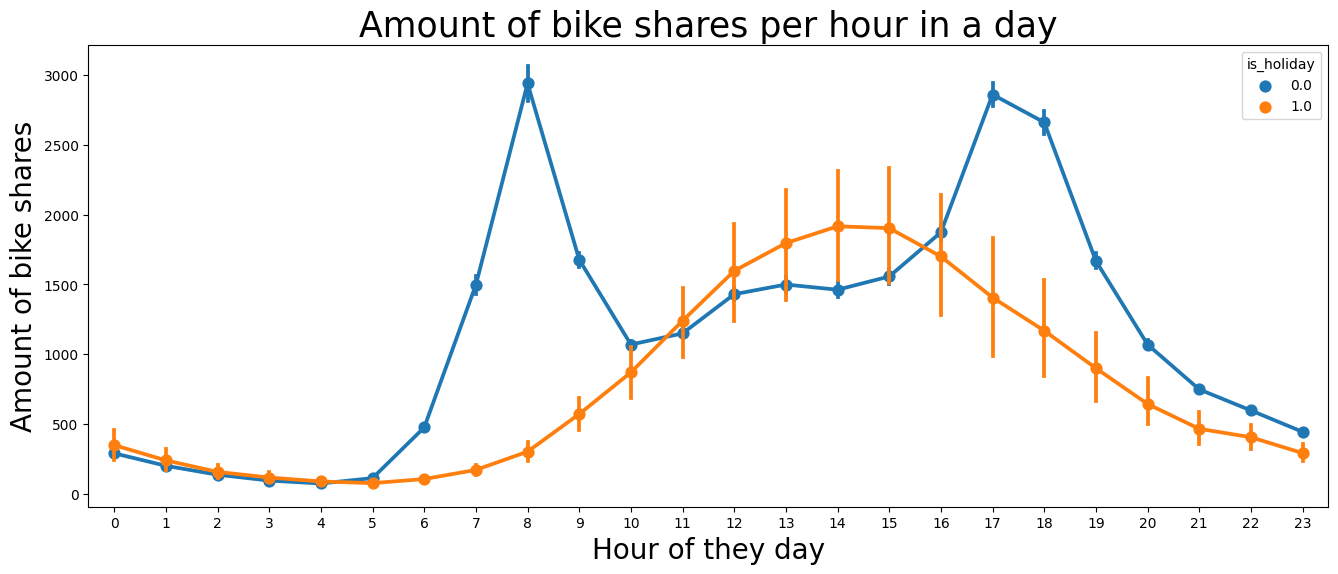

In [11]:
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='hour', y='cnt',hue='is_holiday',data=df)
ax.set_title("Amount of bike shares per hour in a day", fontsize=25)
ax.set_xlabel("Hour of they day", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

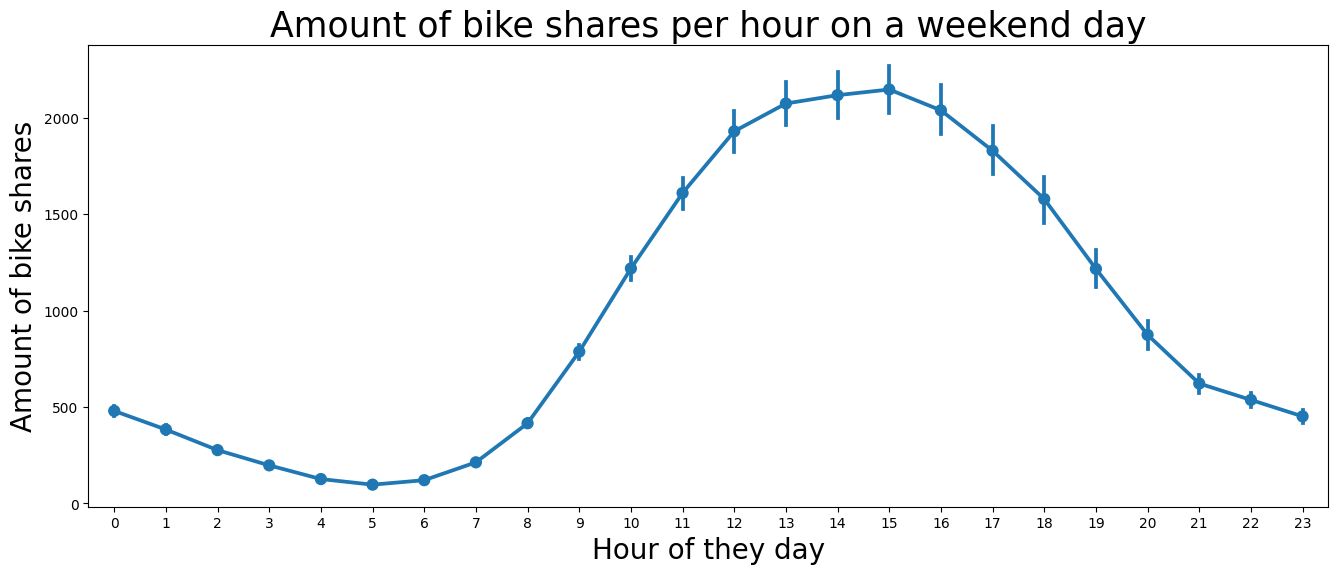

In [12]:
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='hour', y='cnt',data=df[df["is_weekend"]==1])
ax.set_title("Amount of bike shares per hour on a weekend day", fontsize=25)
ax.set_xlabel("Hour of they day", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

In [13]:
plt.figure(figsize=(20,10))

ax = sns.pointplot(x='t1', y='cnt',data=df)
ax.set_title("Amount of bike shares vs real temperature", fontsize=25)
ax.set_xlabel("Real temperature (°C)", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.locator_params(axis='x', nbins=10)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-01 00:00:00

<Figure size 2000x1000 with 0 Axes>

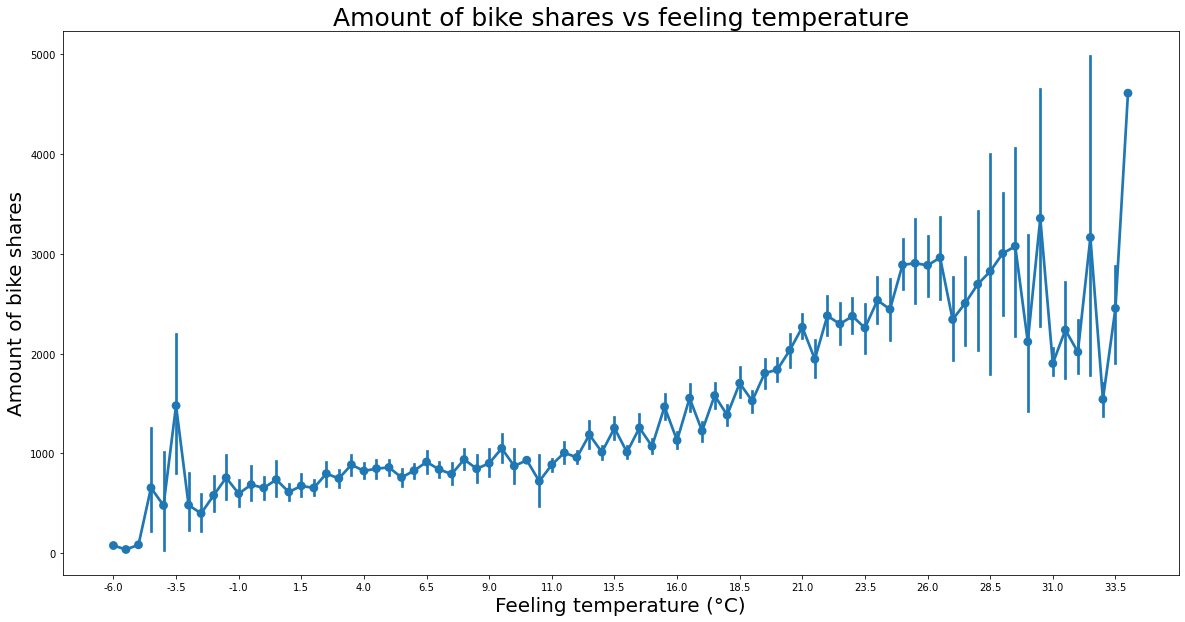

In [ ]:
plt.figure(figsize=(20,10))

ax = sns.pointplot(x='t2', y='cnt',data=df)
ax.set_title("Amount of bike shares vs feeling temperature", fontsize=25)
ax.set_xlabel("Feeling temperature (°C)", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.locator_params(axis='x', nbins=20)
plt.show()

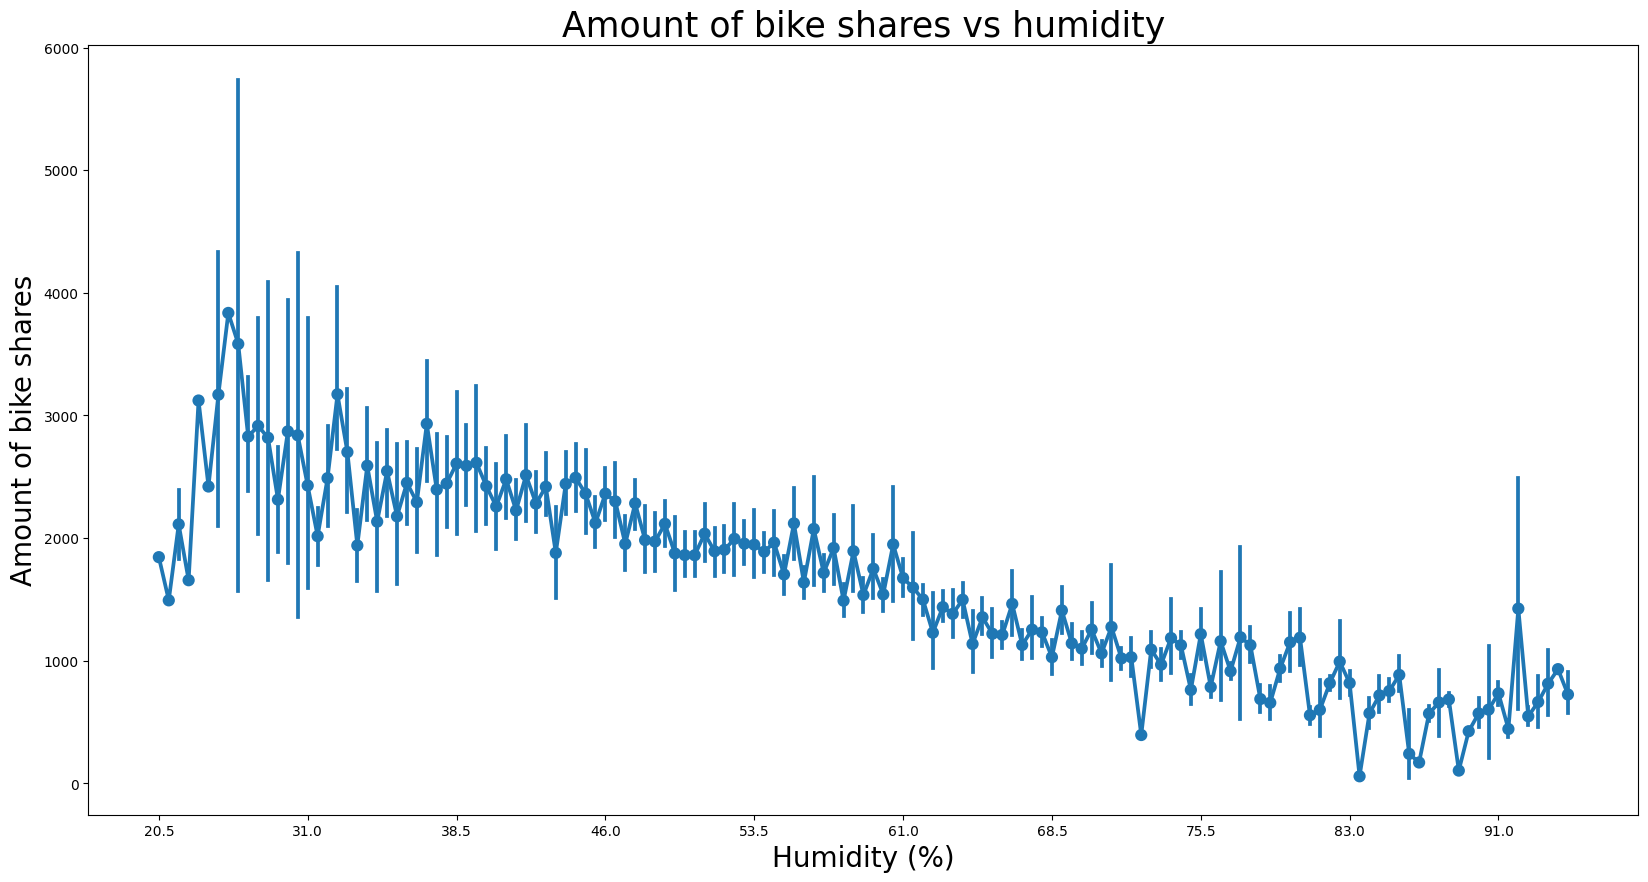

In [14]:
plt.figure(figsize=(20,10))

ax = sns.pointplot(x='hum', y='cnt',data=df)
ax.set_title("Amount of bike shares vs humidity", fontsize=25)
ax.set_xlabel("Humidity (%)", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.locator_params(axis='x', nbins=10)
plt.show()

In [15]:
print("Temperature and humidity have a weak negative correlation:")
df["t1"].corr(df["hum"], method = "pearson")

Temperature and humidity have a weak negative correlation:


-0.44778100063072074

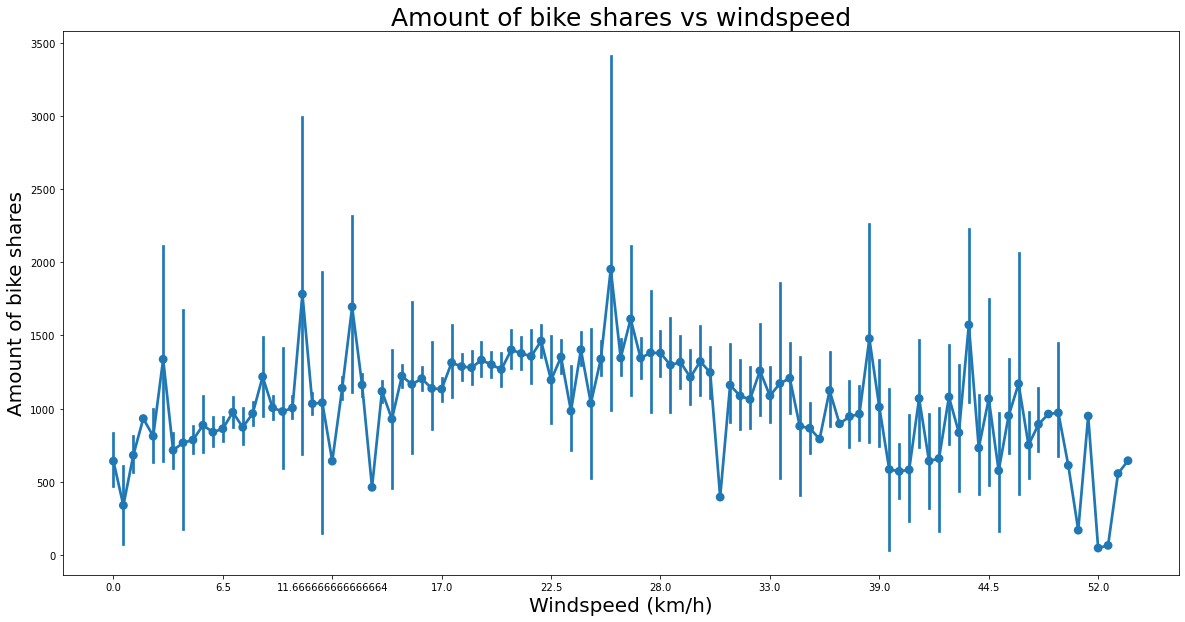

In [ ]:
plt.figure(figsize=(20,10))

ax = sns.pointplot(x='wind_speed', y='cnt',data=df)
ax.set_title("Amount of bike shares vs windspeed", fontsize=25)
ax.set_xlabel("Windspeed (km/h)", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.locator_params(axis='x', nbins=10)
plt.show()


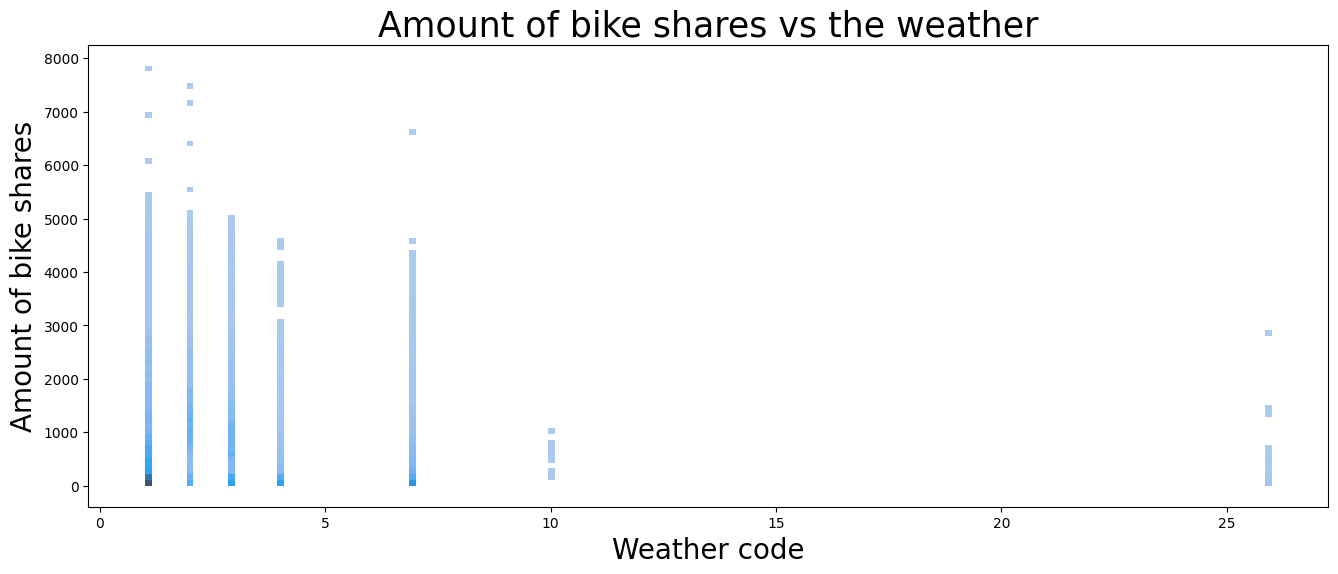

In [16]:
plt.figure(figsize=(16,6))
ax = sns.histplot(data=df,y=df.cnt,x=df.weather_code)
ax.set_title("Amount of bike shares vs the weather", fontsize=25)
ax.set_xlabel("Weather code", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

<Axes: >

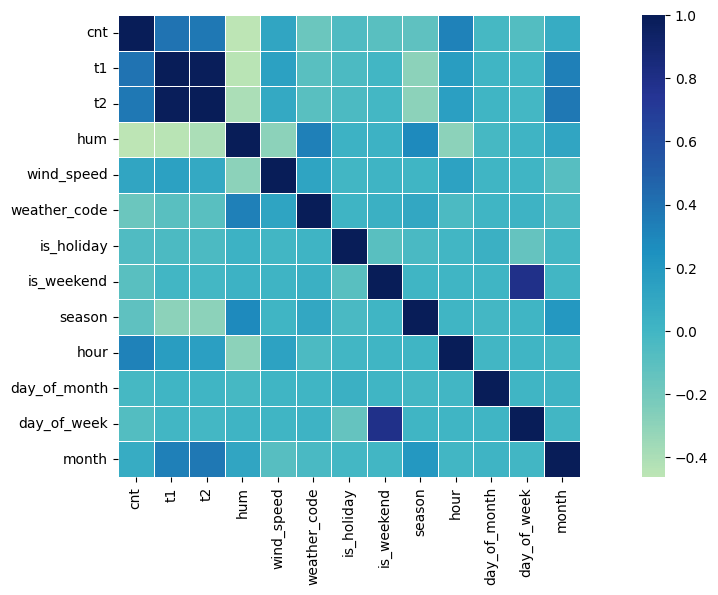

In [17]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),cmap="YlGnBu",square=True,linewidths=.5,center=0)

In [19]:
import math
from sklearn.preprocessing import RobustScaler

training_data_len = math.ceil(len(df) *.9) # taking 90% of data to train and 10% of data to test
testing_data_len = len(df) - training_data_len

time_steps = 30
print(training_data_len)
print(training_data_len-time_steps)
train, test = df.iloc[0:training_data_len], df.iloc[(training_data_len-time_steps):len(df)]
print(df.shape, train.shape, test.shape)

15673
15643
(17414, 13) (15673, 13) (1771, 13)


In [ ]:
# Scale the all of the data from columns ['t1', 't2', 'hum', 'wind_speed']
train_trans = train[['t1', 't2', 'hum', 'wind_speed']].to_numpy()
test_trans = test[['t1', 't2', 'hum', 'wind_speed']].to_numpy()

scaler = RobustScaler() # Handles outliers
train.loc[:, ['t1', 't2', 'hum', 'wind_speed']]=scaler.fit_transform(train_trans)
test.loc[:, ['t1', 't2', 'hum', 'wind_speed']]=scaler.fit_transform(test_trans)

#Scale the all of the data from columns ['cnt']
train['cnt'] = scaler.fit_transform(train[['cnt']])
test['cnt'] = scaler.fit_transform(test[['cnt']])

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\baby\AppData\Local\Temp/ipykernel_12996/408873276.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [ ]:
from tqdm import tqdm_notebook as tqdm

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in tqdm(range(len(train) - time_steps)):
    x_train.append(train.drop(columns='cnt').iloc[i:i + time_steps].to_numpy())
    y_train.append(train.loc[:,'cnt'].iloc[i + time_steps])

#Convert x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

C:\Users\baby\AppData\Local\Temp/ipykernel_12996/2762824084.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(train) - time_steps)):


  0%|          | 0/15643 [00:00<?, ?it/s]

In [ ]:
#Create the x_test and y_test data sets
x_test = []
y_test = df.loc[:,'cnt'].iloc[training_data_len:len(df)]

for i in tqdm(range(len(test) - time_steps)):
    x_test.append(test.drop(columns='cnt').iloc[i:i + time_steps].to_numpy())
    # y_test.append(test.loc[:,'cnt'].iloc[i + time_steps])

#Convert x_test and y_test to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

C:\Users\baby\AppData\Local\Temp/ipykernel_12996/459516828.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(test) - time_steps)):


  0%|          | 0/1741 [00:00<?, ?it/s]

In [ ]:
# All 12 columns of the data
print('Train size:')
print(x_train.shape, y_train.shape)
print('Test size:')
print(x_test.shape, y_test.shape)

Train size:
(15643, 30, 12) (15643,)
Test size:
(1741, 30, 12) (1741,)


In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout , LSTM , Bidirectional 

model = Sequential()
model.add(Bidirectional(LSTM(50,input_shape=(x_train.shape[1],x_train.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer="adam",loss="mse")

# prepared_model = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=[X_test,y_test])

history = model.fit(x_train, y_train, epochs=150, batch_size=30, validation_split=0.1, shuffle=True)

Epoch 1/150
470/470 [==============================] - 8s 11ms/step - loss: 0.3546 - val_loss: 0.3765
Epoch 2/150
470/470 [==============================] - 7s 14ms/step - loss: 0.2591 - val_loss: 0.2656
Epoch 3/150
470/470 [==============================] - 7s 16ms/step - loss: 0.1444 - val_loss: 0.0918
Epoch 4/150
470/470 [==============================] - 8s 18ms/step - loss: 0.0796 - val_loss: 0.0984
Epoch 5/150
470/470 [==============================] - 8s 18ms/step - loss: 0.0622 - val_loss: 0.0752
Epoch 6/150
470/470 [==============================] - 10s 22ms/step - loss: 0.0594 - val_loss: 0.0720
Epoch 7/150
470/470 [==============================] - 12s 26ms/step - loss: 0.0528 - val_loss: 0.0720
Epoch 8/150
470/470 [==============================] - 15s 32ms/step - loss: 0.0508 - val_loss: 0.0677
Epoch 9/150
470/470 [==============================] - 15s 32ms/step - loss: 0.0489 - val_loss: 0.0561
Epoch 10/150
470/470 [==============================] - 11s 23ms/step - loss: 

In [ ]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)#Undo scaling
y_pred

55/55 [==============================] - 1s 4ms/step


array([[ 742.09924],
       [1264.2468 ],
       [1610.8682 ],
       ...,
       [ 424.18744],
       [ 310.05737],
       [ 206.08157]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_lstm

403.5498905252915

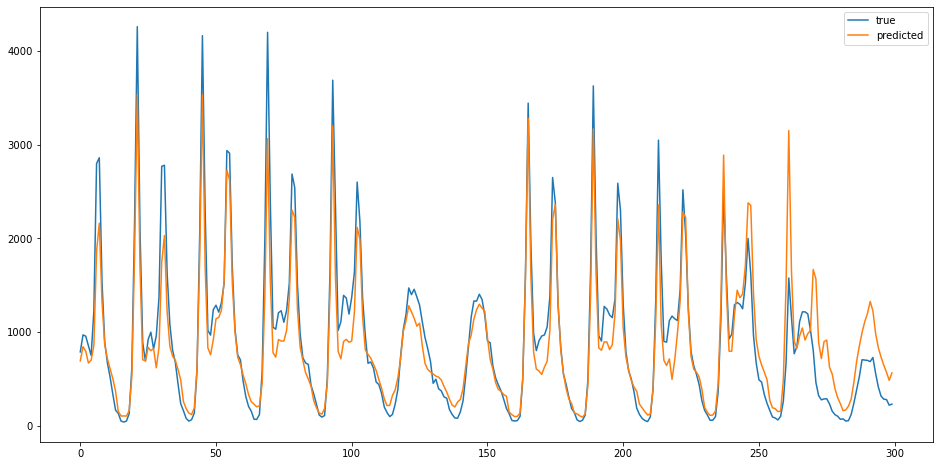

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[1200:1500], label='true')
plt.plot(y_pred[1200:1500], label='predicted')
plt.legend()

Text(0, 0.5, 'mse score')

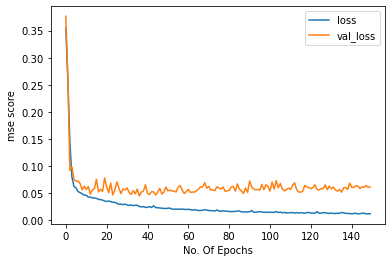

In [ ]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")